## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
### Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load and inspect the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/exchange_rate.csv')
print(df.head())  # Show first few rows instead of the entire dataset

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


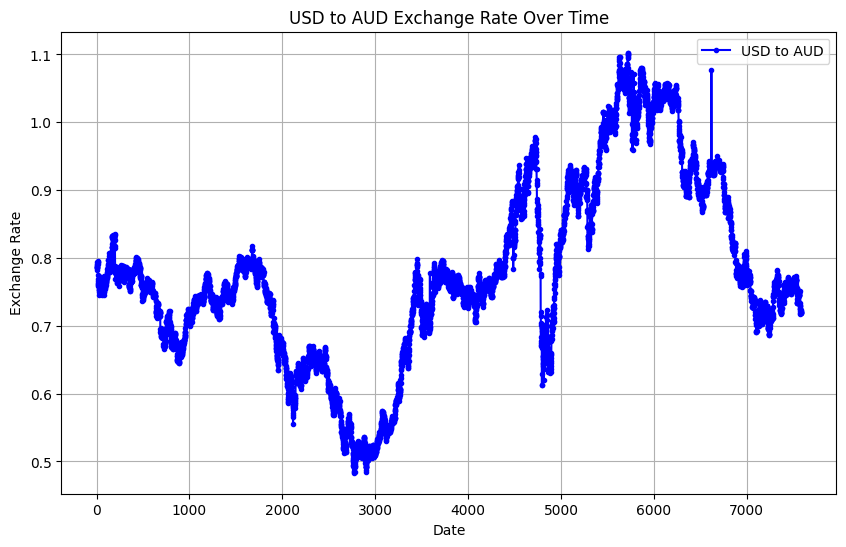

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], color='blue', linestyle='-', marker='o', markersize=3, label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Handle and check for missing values
if df.isnull().values.any():
    df.fillna(method='ffill', inplace=True)
    print("Missing values filled.")
else:
    print("No missing values found.")

print(df.isnull().sum())

No missing values found.
date       0
Ex_rate    0
dtype: int64


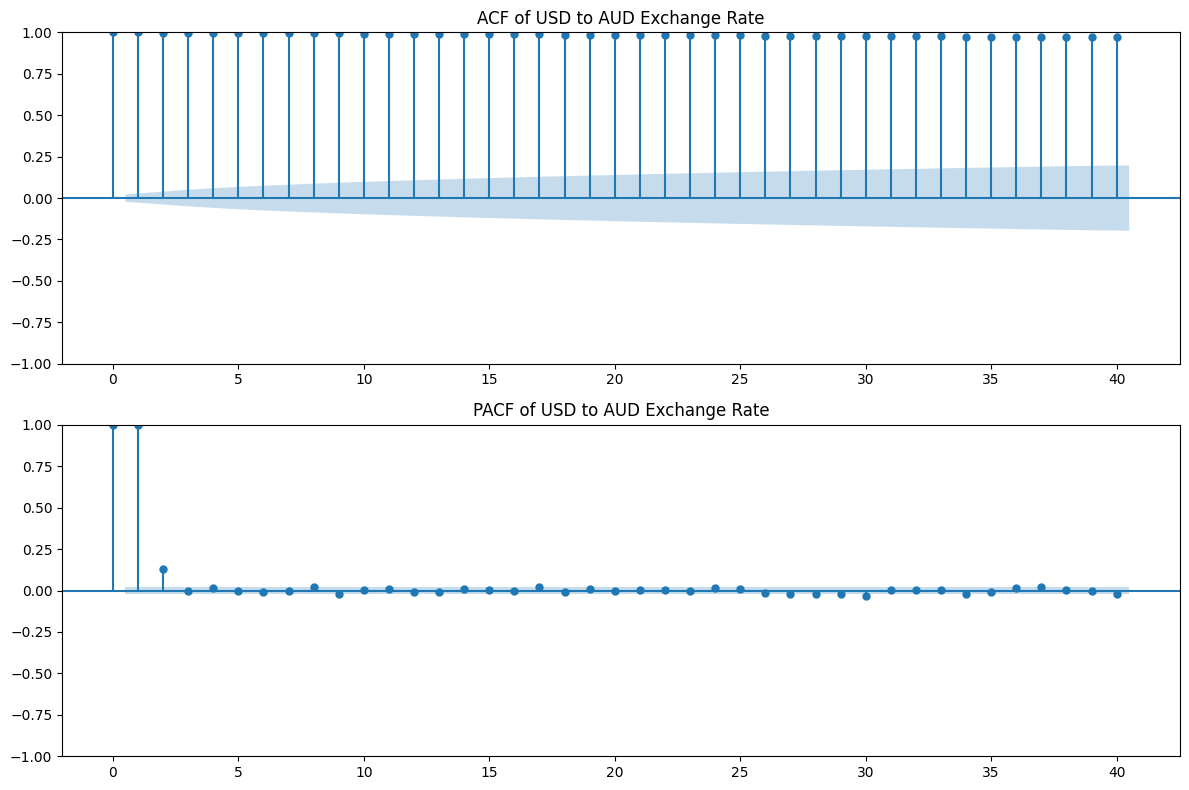

In [ ]:
# Plot ACF and PACF with custom lags
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Ex_rate'], lags=40, ax=axes[0], title='ACF of USD to AUD Exchange Rate')
plot_pacf(df['Ex_rate'], lags=40, ax=axes[1], title='PACF of USD to AUD Exchange Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Define and fit the ARIMA model
arima_order = (2, 1, 2)
model_arima = ARIMA(df['Ex_rate'], order=arima_order)
model_arima_fit = model_arima.fit()

In [ ]:
# Summary of the ARIMA model
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Fri, 16 Aug 2024   AIC                         -56100.135
Time:                        05:50:41   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

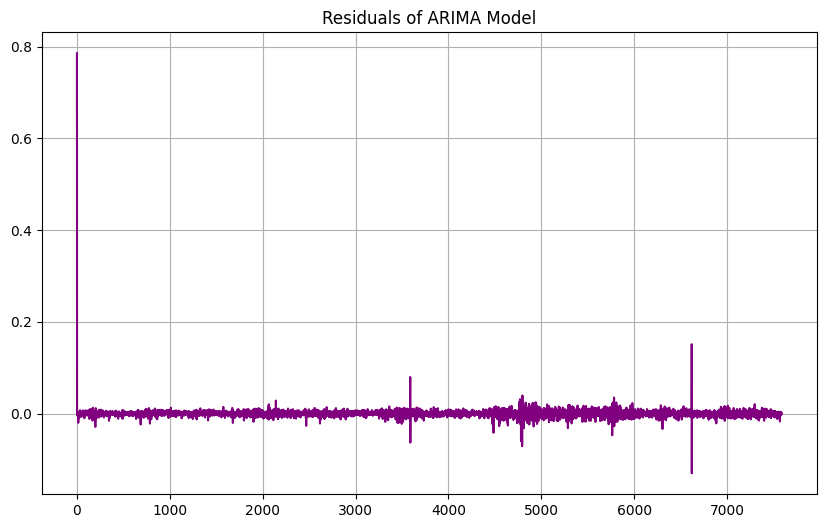

In [ ]:
# Plot residuals of the ARIMA model
residuals_arima = model_arima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals_arima, color='purple')
plt.title('Residuals of ARIMA Model')
plt.grid(True)
plt.show()

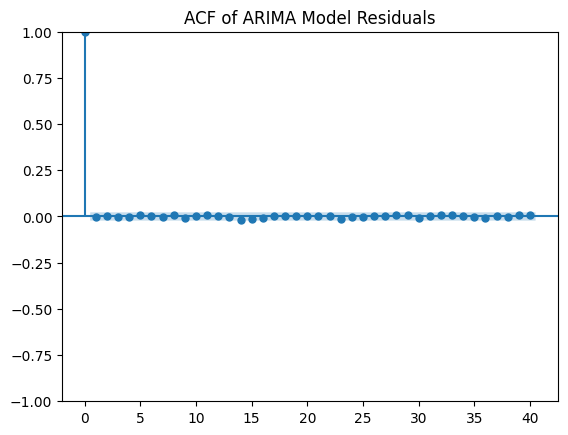

In [ ]:
# Plot ACF of residuals to check for any remaining patterns
plot_acf(residuals_arima, lags=40, title='ACF of ARIMA Model Residuals')
plt.show()


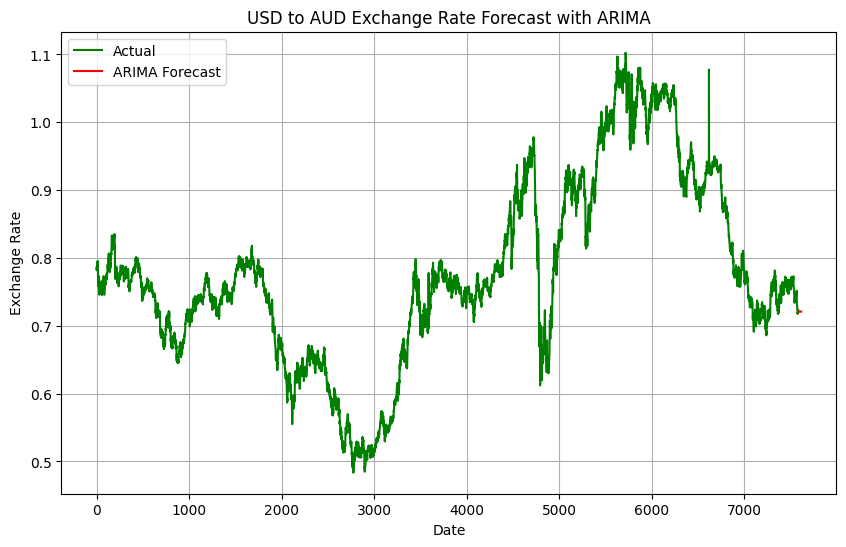

In [ ]:
# Forecast using ARIMA
steps_forecast = 30
forecast_arima = model_arima_fit.forecast(steps=steps_forecast)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual', color='green')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define and fit the Exponential Smoothing model
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='mul', seasonal_periods=12)
model_es_fit = model_es.fit()

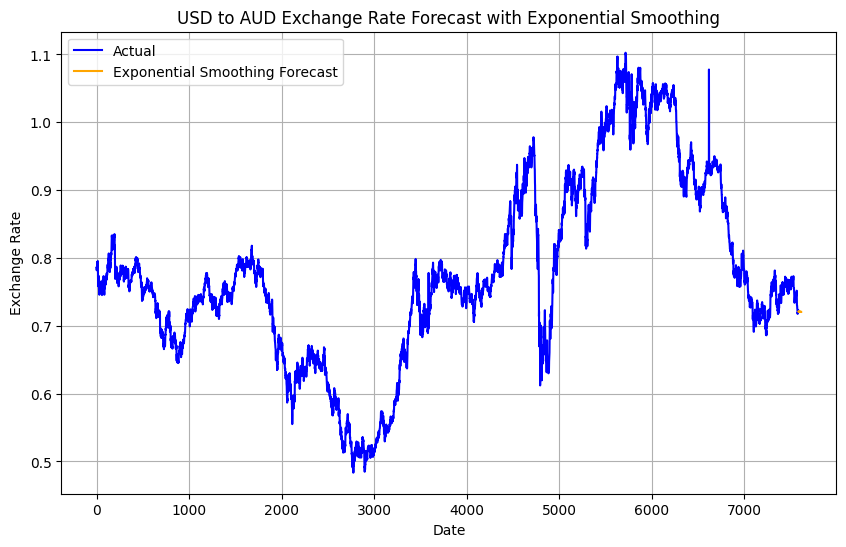

In [ ]:
# Forecast using Exponential Smoothing
forecast_es = model_es_fit.forecast(steps=steps_forecast)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast_es, label='Exponential Smoothing Forecast', color='orange')
plt.title('USD to AUD Exchange Rate Forecast with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate error metrics
mae_arima = mean_absolute_error(df['Ex_rate'][-steps_forecast:], forecast_arima)
rmse_arima = mean_squared_error(df['Ex_rate'][-steps_forecast:], forecast_arima, squared=False)

mae_es = mean_absolute_error(df['Ex_rate'][-steps_forecast:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-steps_forecast:], forecast_es, squared=False)

print(f'ARIMA Model - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}')
print(f'Exponential Smoothing - MAE: {mae_es:.4f}, RMSE: {rmse_es:.4f}')

ARIMA Model - MAE: 0.0127, RMSE: 0.0170
Exponential Smoothing - MAE: 0.0129, RMSE: 0.0171


### Conclusion:
This approach enhances readability and customization by structuring the code into clear, distinct sections. It introduces adjustments like custom ARIMA order and lag settings in ACF/PACF plots, offering deeper insights into the data. The code also improves visualization through customized plot styling and gridlines. Overall, this version balances simplicity and flexibility, making it more suitable for exploratory analysis and fine-tuning model parameters.